In [1]:
import torch
from torch import nn
from d2l import torch as d2l


batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

D:\Study\anaconda\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [3]:
print(params)

[Parameter containing:
tensor([[ 2.4217e-04, -3.8460e-03, -5.0143e-03,  ...,  3.6728e-03,
          1.0774e-02,  9.8727e-03],
        [-1.1269e-02,  4.4448e-03, -2.8452e-03,  ...,  4.6129e-05,
         -2.2214e-02, -8.3211e-03],
        [-9.4163e-03,  7.4461e-03, -1.6198e-02,  ...,  4.1286e-03,
          2.2462e-03, -5.1659e-03],
        ...,
        [ 2.9492e-03, -1.2102e-02,  8.9116e-03,  ..., -3.7949e-03,
          2.2899e-03, -1.5821e-02],
        [ 5.1711e-04, -3.4208e-03,  7.3242e-04,  ..., -1.1547e-02,
         -1.0734e-03, -2.4405e-03],
        [-1.7187e-02,  9.9886e-03,  1.2858e-03,  ..., -5.5829e-03,
          8.1929e-03,  2.6440e-03]], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [4]:
#定义激活函数 relu
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

In [8]:
loss = nn.CrossEntropyLoss()

<bound method Module.get_parameter of CrossEntropyLoss()>


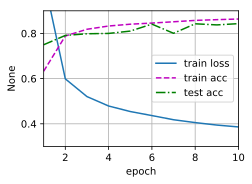

In [9]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

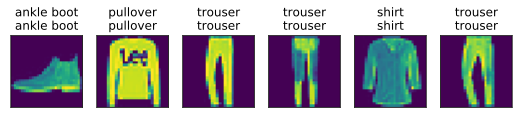

In [13]:
d2l.predict_ch3(net, test_iter)
